In [49]:
import requests
import pandas as pd
import sqlite3
import json
import matplotlib.pyplot as plt
import folium
from folium import plugins
%matplotlib inline
f = open("./midterm_project/yelp_api_key","r")
api_key = f.readline()
total = 0
my_house_coordinates = (41.036923,-73.756332)

In [11]:
def load_records_in_db(yelp_response_bus):
# This function loads the records in the dentist database
    conn = sqlite3.connect('businessdb.sqlite')
    cur = conn.cursor()
# This will create the table only if it does not exist to allow for reruns
    cur.executescript('''
    CREATE TABLE if not exists business (
        yelp_id TEXT NOT NULL PRIMARY KEY UNIQUE,
        name   TEXT,
        review_count INTEGER,
        rating REAL,
        longitude REAL,
        latitude REAL,
        address TEXT,
        phone TEXT)''')
# This loops goes through each record and extracts the fields to load in the database
    for business in yelp_response_bus:
        yelp_id = business['id']
        name = business['name']
        review_count = business['review_count']
        rating = float(business['rating'])
        latitude = business['coordinates']['latitude']
        longitude = business['coordinates']['longitude']
# This is just to make sure that the address fields are not empty
        
        if (len(business['location']['display_address'])) == 1:
            address = business['location']['display_address'][0]
        elif (len(business['location']['display_address'])) == 2:
            address = business['location']['display_address'][0] + ', ' + business['location']['display_address'][1]
        else:
            address = 'n/a'
        phone = business['display_phone']
# This is where values get inserted in the table
        cur.execute('''INSERT OR IGNORE INTO business (yelp_id, name,review_count, rating, latitude, longitude, address, phone)
        VALUES (?, ?, ?, ?, ?, ?, ?, ? )''', (yelp_id, name, review_count, rating, latitude, longitude, address, phone)) 
        conn.commit()
   


In [37]:
def retrieve_business(term= 'Restaurants', location = 'White Plains, NY', offset = 0):
# This is the function that retrieves records from yelp
    SEARCH_LIMIT = 50


    url = 'https://api.yelp.com/v3/businesses/search'

    headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

    url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT,
                'offset':  offset
            }
    response = requests.get(url, headers=headers, params=url_params)
    yelp_response = response.json()
    print("yelp_response: ", yelp_response)
    total = yelp_response['total']
    response_businesses = yelp_response['businesses']
    times = total / SEARCH_LIMIT
    print("There are " + str(yelp_response['total']) + " records in this search")
    load_records_in_db(yelp_response['businesses'])
    print("response_businesses[1]: ",response_businesses[1])
    return response_businesses

In [39]:
retrieve_business('Restaurants',"White Plains, NY",950)

yelp_response:  {'businesses': [{'id': '3ML4W_QRwpWczS6hFgs3uA', 'alias': 'tin-marin-bronx', 'name': 'Tin Marin', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/d_NaSVmp6iFJDi4A7dZSKQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/tin-marin-bronx?adjust_creative=ByRc0WRKDwKQRmxaVAdajw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=ByRc0WRKDwKQRmxaVAdajw', 'review_count': 248, 'categories': [{'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}], 'rating': 3.5, 'coordinates': {'latitude': 40.8870296802542, 'longitude': -73.9068375260971}, 'transactions': [], 'price': '$$', 'location': {'address1': '3708 Riverdale Ave', 'address2': '', 'address3': '', 'city': 'Bronx', 'zip_code': '10463', 'country': 'US', 'state': 'NY', 'display_address': ['3708 Riverdale Ave', 'Bronx, NY 10463']}, 'phone': '+17188844800', 'display_phone': '(718) 884-4800', 'distance': 20242.023899722702}, {'id': 'ZUyKJ3hwCMS8pc8QIrXb9Q', 'alias': 'elevation-burger-rye-br

[{'id': '3ML4W_QRwpWczS6hFgs3uA',
  'alias': 'tin-marin-bronx',
  'name': 'Tin Marin',
  'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/d_NaSVmp6iFJDi4A7dZSKQ/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/tin-marin-bronx?adjust_creative=ByRc0WRKDwKQRmxaVAdajw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=ByRc0WRKDwKQRmxaVAdajw',
  'review_count': 248,
  'categories': [{'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}],
  'rating': 3.5,
  'coordinates': {'latitude': 40.8870296802542,
   'longitude': -73.9068375260971},
  'transactions': [],
  'price': '$$',
  'location': {'address1': '3708 Riverdale Ave',
   'address2': '',
   'address3': '',
   'city': 'Bronx',
   'zip_code': '10463',
   'country': 'US',
   'state': 'NY',
   'display_address': ['3708 Riverdale Ave', 'Bronx, NY 10463']},
  'phone': '+17188844800',
  'display_phone': '(718) 884-4800',
  'distance': 20242.023899722702},
 {'id': 'ZUyKJ3hwCMS8pc8QIrXb9Q',
  'alias'

In [54]:
conn = sqlite3.connect("businessdb.sqlite")

In [55]:
restaurant_df = pd.read_sql_query("select * from business;", conn)

In [56]:
restaurant_df.head()

,yelp_id,name,review_count,rating,longitude,latitude,address,phone
0,z2rJbJc-k8S_DyaDdnWBYQ,Lilly's,344,4.0,-73.764556,41.028625,"169 Mamaroneck Ave, White Plains, NY 10601",(914) 997-5600
1,s5n12j1Mo04sKtNrxhGQLQ,Purple Corn Peruvian Rotisserie Joint,24,4.5,-73.766370,41.030710,"72 Mamaroneck Ave, White Plains, NY 10601",(914) 339-0900
2,0KVRpJLGvGG9xu8HS327sw,Freebird Kitchen and Bar,149,4.0,-73.764720,41.028675,"161 Mamaroneck Ave, White Plains, NY 10601",(914) 607-2476
3,1QHiNMX-LB5y1PUupRHC7w,Sapori of Scarsdale,4,5.0,-73.807108,40.988728,"2 Chase Rd, Scarsdale, NY 10583",(914) 874-5316
4,mPgqEGJ_C-KKvj-cPn1r2A,Via Garibaldi,63,4.5,-73.764140,41.034040,"1 N Broadway, White Plains, NY 10601",(914) 468-1888


In [57]:
restaurant_df.describe()

,review_count,rating,longitude,latitude
count,986.000000,986.000000,986.000000,986.000000
mean,102.407708,3.876775,-73.642848,41.033943
std,113.177136,0.586462,3.262211,0.573639
min,1.000000,1.000000,-73.959149,40.871300
25%,30.000000,3.500000,-73.846534,40.956730
50%,72.000000,4.000000,-73.787655,41.015110
75%,132.000000,4.000000,-73.757542,41.039721
max,1078.000000,5.000000,0.734730,55.892532


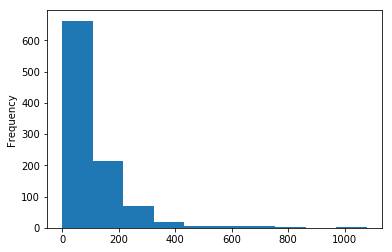

In [58]:
restaurant_df.review_count.plot.hist()

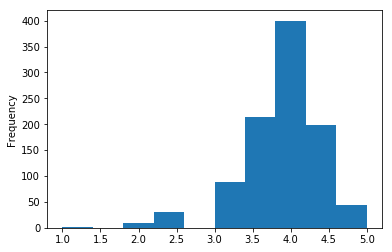

In [59]:
restaurant_df.rating.plot.hist()

In [60]:
restaurant_df.corr()

,review_count,rating,longitude,latitude
review_count,1.000000,-0.136015,-0.042249,-0.043531
rating,-0.136015,1.000000,0.027244,0.022797
longitude,-0.042249,0.027244,1.000000,0.967778
latitude,-0.043531,0.022797,0.967778,1.000000
